In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
df=pd.read_csv('/content/final-dataset.csv')

In [ ]:
df.head()

,NAME,SMILES,label
0,Allantoin,C1(C(=O)NC(=O)N1)NC(=O)N,0
1,Benzene,C1=CC=CC=C1,1
2,Catechol,C1=CC=C(C(=C1)O)O,1
3,Kepone,C1(=O)C2(C3(C4(C1(C5(C2(C3(C(C45Cl)(Cl)Cl)Cl)C...,1
4,Coumarin,C1=CC=C2C(=C1)C=CC(=O)O2,1


In [ ]:

missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)


Missing Values:
NAME      0
SMILES    0
label     0
dtype: int64


In [ ]:
carcinogenic = df['label'].value_counts().get(1)
non_carcinogenic = df['label'].value_counts().get(0)

print("Number of Oncogenic Compounds:", carcinogenic)
print("Number of Non-Oncogenic Compounds:", non_carcinogenic)


Number of Oncogenic Compounds: 1397
Number of Non-Oncogenic Compounds: 427


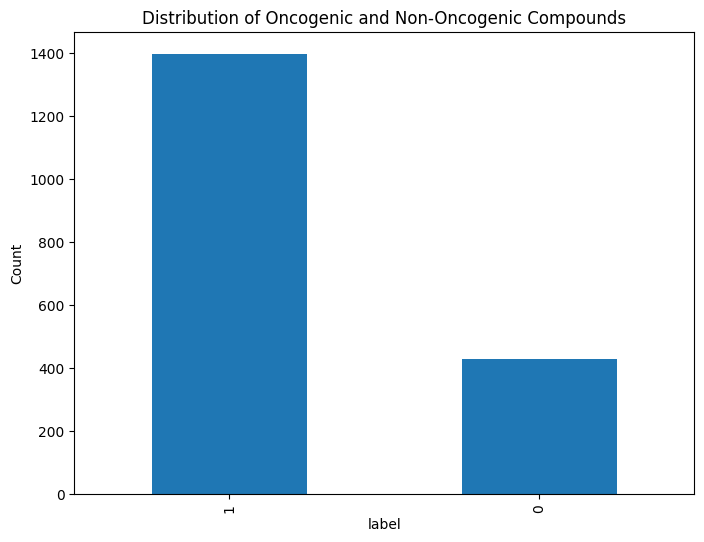

In [ ]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Oncogenic and Non-Oncogenic Compounds')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [ ]:

from sklearn.utils import resample

carcinogenic_data = df[df['label'] == 1]
non_carcinogenic_data = df[df['label'] == 0]

carcinogenic_upsampled = resample(
    carcinogenic_data,
    replace=True,
    n_samples=len(non_carcinogenic_data),
    random_state=42
)

balanced_data = pd.concat([carcinogenic_upsampled, non_carcinogenic_data])

balanced_data = balanced_data.sample(frac=1, random_state=42)

print("Balanced Data:")
print(balanced_data['label'].value_counts())


Balanced Data:
label
1    427
0    427
Name: count, dtype: int64


In [ ]:

X = balanced_data.drop('label', axis=1)
Y = balanced_data['label']
print(X)


                                                   NAME  \
1452                                           Dipyrone   
28               Isopropyl-N-(3-chlorophenyl) carbamate   
1156                      3-Hydroxy-p-butyrophenetidide   
243                            3-Nitro-p-acetophenetide   
907                        Demeclocycline hydrochloride   
...                                                 ...   
610                                 2-Biphenylamine.HCl   
441                                           Indolidan   
1340                                          Carbazole   
29    O,O-Diethyl-o-(3,5,6-trichloro-2-pyridyl)phosp...   
1589                           N-Nitroso-N-isobutylurea   

                                       SMILES  
1452                    CC(=O)N(C)C1=CC=CC=C1  
28                CC(C)OC(=O)NC1=CC(=CC=C1)Cl  
1156                       O=C1C(C=O)C=C(O)N1  
243     CCOC1=C(C=C(C=C1)NC(=O)C)[N+](=O)[O-]  
907           CC1=C(C(=O)O)C(=CC(=C1)C(=O)C)N  
...

In [ ]:
print(Y)


1452    1
28      0
1156    1
243     1
907     0
       ..
610     1
441     1
1340    1
29      0
1589    1
Name: label, Length: 854, dtype: int64


In [ ]:
pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Function to generate molecular descriptors
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:  # To handle invalid SMILES
        return None
    descriptors = {
        'MolecularWeight': Descriptors.MolWt(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'TPSA': Descriptors.TPSA(mol),  # Topological polar surface area
        'LogP': Descriptors.MolLogP(mol)  # LogP (lipophilicity)
    }
    return descriptors

# Apply the function to each row in the dataset
df['descriptors'] = df['SMILES'].apply(generate_descriptors)

# Drop rows where SMILES were invalid and descriptors are None
df = df.dropna(subset=['descriptors'])

# Convert the descriptors to separate columns
descriptors_df = pd.DataFrame(df['descriptors'].tolist())
df = pd.concat([df, descriptors_df], axis=1)
df = df.drop(columns=['descriptors'])

print(df.head())


[14:20:33] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:20:33] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:20:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:20:33] SMILES Parse Error: unclosed ring for input: 'C1=CC(C)=CC(N)=N'
[14:20:33] SMILES Parse Error: unclosed ring for input: 'C1=NN=NC(C)=O'
[14:20:33] Explicit valence for atom # 3 O, 3, is greater than permitted
[14:20:33] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[14:20:33] SMILES Parse Error: unclosed ring for input: 'C1=CC=C(CBr)C(=O)OBr'
[14:20:33] SMILES Parse Error: unclosed ring for input: 'C1=CC=C(C(Cl)=O)C(Cl)=O'
[14:20:33] SMILES Parse Error: syntax error while parsing: CC1=CC=CC(C=O)=C1[HCl]
[14:20:33] SMILES Parse Error: Failed parsing SMILES 'CC1=CC=CC(C=O)=C1[HCl]' for input: 'CC1=CC=CC(C=O)=C1[HCl]'
[14:20:33] SMILES Parse Error: syntax error while parsing: CC1=CC=C(C=N)C=C1[HCl]
[14:20:33] SMILES Parse Error: Failed parsing SM

        NAME                                             SMILES  label  \
0  Allantoin                           C1(C(=O)NC(=O)N1)NC(=O)N    0.0   
1    Benzene                                        C1=CC=CC=C1    1.0   
2   Catechol                                  C1=CC=C(C(=C1)O)O    1.0   
3     Kepone  C1(=O)C2(C3(C4(C1(C5(C2(C3(C(C45Cl)(Cl)Cl)Cl)C...    1.0   
4   Coumarin                           C1=CC=C2C(=C1)C=CC(=O)O2    1.0   

   MolecularWeight  NumHDonors  NumHAcceptors    TPSA    LogP  
0          158.117         4.0            3.0  113.32 -2.1798  
1           78.114         0.0            0.0    0.00  1.6866  
2          110.112         2.0            2.0   40.46  1.0978  
3          490.639         0.0            1.0   17.07  4.6182  
4          146.145         0.0            2.0   30.21  1.7930  


In [ ]:
print(df)

           NAME                                             SMILES  label  \
0     Allantoin                           C1(C(=O)NC(=O)N1)NC(=O)N    0.0   
1       Benzene                                        C1=CC=CC=C1    1.0   
2      Catechol                                  C1=CC=C(C(=C1)O)O    1.0   
3        Kepone  C1(=O)C2(C3(C4(C1(C5(C2(C3(C(C45Cl)(Cl)Cl)Cl)C...    1.0   
4      Coumarin                           C1=CC=C2C(=C1)C=CC(=O)O2    1.0   
...         ...                                                ...    ...   
1701        NaN                                                NaN    NaN   
1702        NaN                                                NaN    NaN   
1724        NaN                                                NaN    NaN   
1725        NaN                                                NaN    NaN   
1727        NaN                                                NaN    NaN   

      MolecularWeight  NumHDonors  NumHAcceptors    TPSA    LogP  
0       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score

# Define X (features) and y (labels)
X = df[['MolecularWeight', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'LogP']]
y = df['label']
X=X.dropna()
y=y.dropna()
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print(pd.Series(y_res).value_counts())


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


y_probs = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"roc_auc: {roc_auc}")

label
0.0    1305
1.0    1305
Name: count, dtype: int64
Accuracy: 0.8639846743295019
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       239
         1.0       0.92      0.82      0.87       283

    accuracy                           0.86       522
   macro avg       0.87      0.87      0.86       522
weighted avg       0.87      0.86      0.86       522

roc_auc: 0.9357821902213285


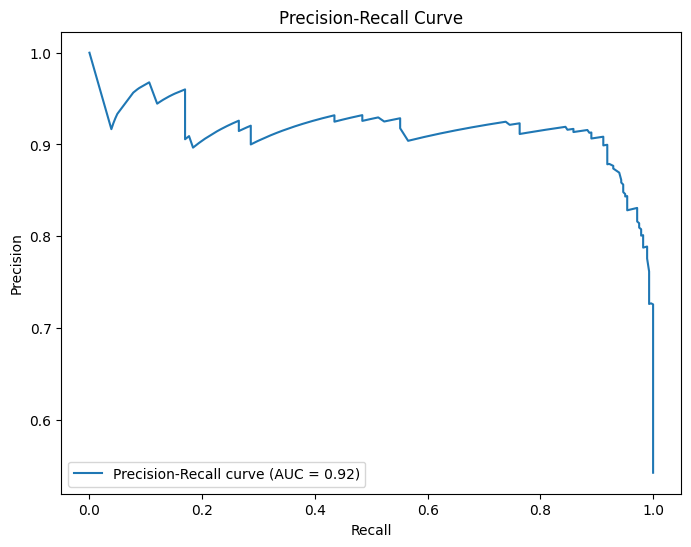

In [ ]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

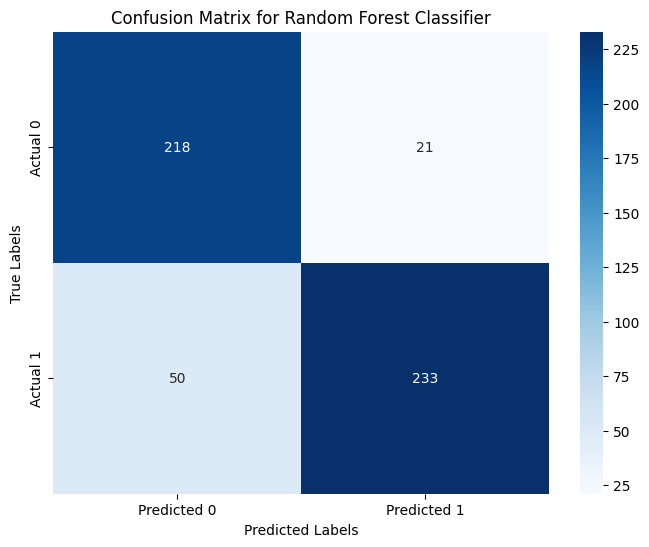

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import pickle
filename = 'oncogenic_model.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to oncogenic_model.pkl


In [ ]:
!pip install pytesseract


In [ ]:
import pytesseract
from PIL import Image

# Load your image
image = Image.open('/content/image.png')

# Perform OCR
text = pytesseract.image_to_string(image)
text_lines = text.split('\n')
single_elements = [item.strip() for sublist in text_lines for item in sublist.split(',')]

# Remove any empty strings or unwanted characters
single_elements = [item.lower() for item in single_elements if item]
single_elements.remove(single_elements[0])
print(single_elements)

['isopropyl myristate', 'stearic acid', 'mineral', 'oil', 'glyceryl stearate', 'ethylhexyl methoxycinnamate', 'niacinamide', 'glycerin', 'triethanolamine', 'phenoxyethanol', 'dimethicone', 'butyl', 'methoxydibenzoylmethane', 'carbomer', 'cetyl alcohol', 'methyl', 'paraben', 'disodium edta', 'hydroxystearic acid', 'propylparaben', 'petrolatum', 'titanium dioxide (and) aluminum hydroxide (and)', 'stearic acid', 'titanium dioxide (and) aluminum hydroxide (and)', 'dimethicone', 'cl 77491 (and) isopropyl titanium triisostearate', '(and) triethoxysilyethyl polydimethylsiloxyethyl dimethicone', 'yogurt powder', 'perfume', 'alpha-isomethyl ionone', 'benzyl', 'salicylate', 'butyphenylmethylpropional', 'citronellol', 'geraniol', 'hexyl cinnamal', 'hydroxycitronellal', 'limonene', 'linalool.']


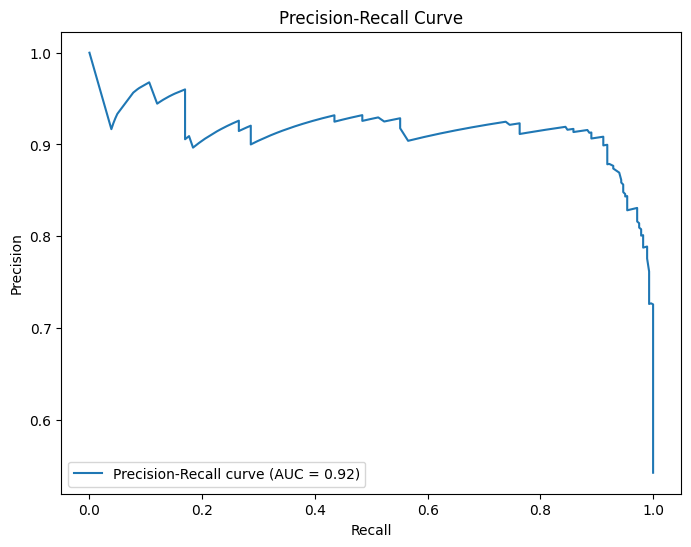

In [ ]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.8352490421455939
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84       239
         1.0       0.91      0.77      0.84       283

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.85      0.84      0.84       522



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                      n_estimators=100,
                                       random_state=42)


bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

y_probs = bagging_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC score {roc_auc}")

Accuracy: 0.8390804597701149
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       239
         1.0       0.91      0.78      0.84       283

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.85      0.84      0.84       522

ROC-AUC score 0.9220544967990894


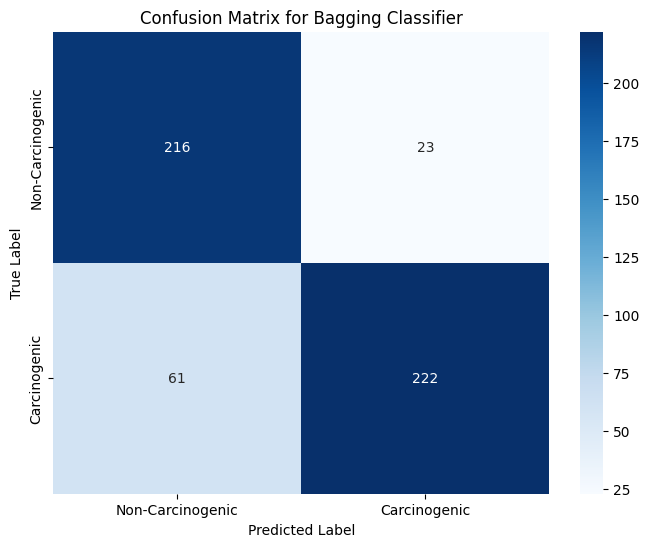

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Carcinogenic', 'Carcinogenic'],
            yticklabels=['Non-Carcinogenic', 'Carcinogenic'])
plt.title('Confusion Matrix for Bagging Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
!pip install pubchempy

In [ ]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

def get_smiles_from_name(chemical_name):
    try:
        compound = pcp.get_compounds(chemical_name, 'name')
        if compound:
            return compound[0].canonical_smiles
        else:
            raise ValueError(f"No SMILES found for: {chemical_name}")
    except Exception as e:
        print(f"Error retrieving SMILES for {chemical_name}: {e}")
        return None

def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smiles}")
    descriptors = {
        'MolecularWeight': Descriptors.MolWt(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'TPSA': Descriptors.TPSA(mol),
        'LogP': Descriptors.MolLogP(mol)
    }
    return pd.DataFrame([descriptors])

new_chemical_names = ['ethyl alcohol', 'Sorbitol', 'Spirodiclofen', 'Sotalol.HCl']

new_data_smiles = [get_smiles_from_name(name) for name in new_chemical_names]

new_data_smiles = [smiles for smiles in new_data_smiles if smiles is not None]

new_data_features = pd.concat([compute_descriptors(smiles) for smiles in new_data_smiles], ignore_index=True)

new_predictions = rf_classifier.predict(new_data_features)

for name, pred in zip(new_chemical_names, new_predictions):
    print(f"Chemical: {name}, Predicted Oncogenicity: {'Oncogenic' if pred == 1 else 'Non-oncogenic'}")


Chemical: ethyl alcohol, Predicted Oncogenicity: Oncogenic
Chemical: Sorbitol, Predicted Oncogenicity: Non-oncogenic
Chemical: Spirodiclofen, Predicted Oncogenicity: Non-oncogenic
Chemical: Sotalol.HCl, Predicted Oncogenicity: Non-oncogenic


In [ ]:

svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluate the model
print(classification_report(y_test, y_pred))

y_probs = svm_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.6379310344827587
              precision    recall  f1-score   support

         0.0       0.62      0.55      0.58       239
         1.0       0.65      0.71      0.68       283

    accuracy                           0.64       522
   macro avg       0.63      0.63      0.63       522
weighted avg       0.64      0.64      0.64       522

ROC AUC Score: 0.6689755607138105


Accuracy: 0.8180076628352491
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       239
         1.0       0.89      0.76      0.82       283

    accuracy                           0.82       522
   macro avg       0.82      0.82      0.82       522
weighted avg       0.83      0.82      0.82       522

ROC AUC Score: 0.8992785014119491


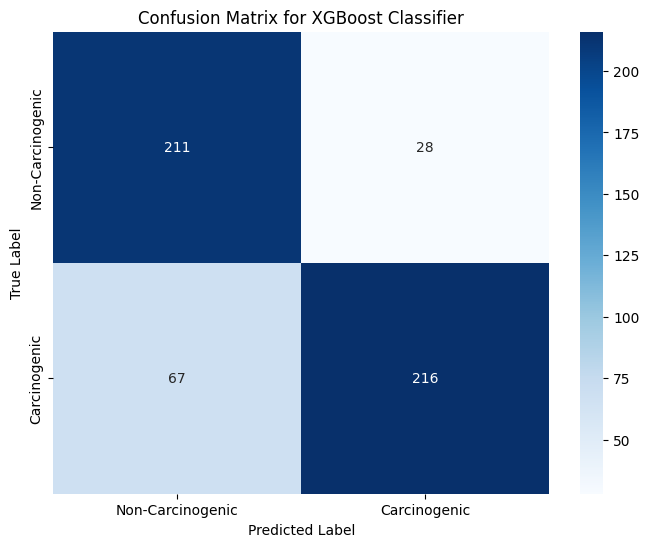

In [ ]:


from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluate the model
print(classification_report(y_test, y_pred))

y_probs = xgb_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print(f"ROC AUC Score: {roc_auc}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Carcinogenic', 'Carcinogenic'],
            yticklabels=['Non-Carcinogenic', 'Carcinogenic'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
